# TCGA database preprocess

We often download patient survival data from the TCGA database for analysis in order to verify the importance of genes in cancer. However, the pre-processing of the TCGA database is often a headache. Here, we have introduced the TCGA module in Pyomic, a way to quickly process the file formats we download from the TCGA database. We need to prepare 3 files as input:

- gdc_sample_sheet: The `Sample Sheet` button of TCGA, and we can get `tsv` file from it
- gdc_download_files: The `Download/Cart` button of TCGA, and we get `tar.gz` included all file you selected/
- clinical_cart: The `Clinical` button of TCGA, and we can get `tar.gz` included all clinical of your files

In [13]:
import Pyomic
import scanpy as sc
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

## TCGA counts read

Here, we use `Pyomic.bulk.TCGA` to perform the `gdc_sample_sheet`, `gdc_download_files` and `clinical_cart` you download before. The raw count, fpkm and tpm matrix will be stored in anndata object

In [3]:
%%time
gdc_sample_sheep='data/TCGA_AML/gdc_sample_sheet.2023-03-18.tsv'
gdc_download_files='data/TCGA_AML/gdc_download_20230318_152144.190355'
clinical_cart='data/TCGA_AML/clinical.cart.2023-03-18'
aml_tcga=Pyomic.bulk.TCGA(gdc_sample_sheep,gdc_download_files,clinical_cart)
aml_tcga.adata_init()

tcga module init success
...index init
... expression matrix init
...anndata construct
CPU times: user 24.7 s, sys: 2.52 s, total: 27.2 s
Wall time: 27.8 s


We can save the anndata object for the next use

In [4]:
aml_tcga.adata.write_h5ad('data/TCGA_AML/aml_tcga_raw.h5ad',compression='gzip')

Note: Each time we read the anndata file, we need to initialize the TCGA object using three paths so that the subsequent TCGA functions such as survival analysis can be used properly

In [6]:
aml_tcga=Pyomic.bulk.TCGA(gdc_sample_sheep,gdc_download_files,clinical_cart)
aml_tcga.adata_read('data/TCGA_AML/aml_tcga_raw.h5ad')

tcga module init success
... anndata reading


## Meta init
As the TCGA reads the gene_id, we need to convert it to gene_name as well as adding basic information about the patient. Therefore we need to initialise the patient's meta information.

In [7]:
aml_tcga.adata_meta_init()

...anndata meta init ['gene_name', 'gene_type'] ['Case ID', 'Sample Type']


AnnData object with n_obs × n_vars = 151 × 60664
    obs: 'Case ID', 'Sample Type'
    var: 'gene_name', 'gene_type', 'gene_id'
    layers: 'deseq_normalize', 'fpkm', 'tpm'

## Survial init
We set up the path for Clinical earlier, but in fact we did not import the patient information in the previous process, we only initially determined the id of the patient's TCGA, so we attracted to initialize the clinical information

In [8]:
aml_tcga.survial_init()
aml_tcga.adata

AnnData object with n_obs × n_vars = 151 × 60664
    obs: 'Case ID', 'Sample Type', 'vital_status', 'days'
    var: 'gene_name', 'gene_type', 'gene_id'
    layers: 'deseq_normalize', 'fpkm', 'tpm'

To visualize the gene you interested, we can use `survival_analysis` to finish it. 

0.431964807708195

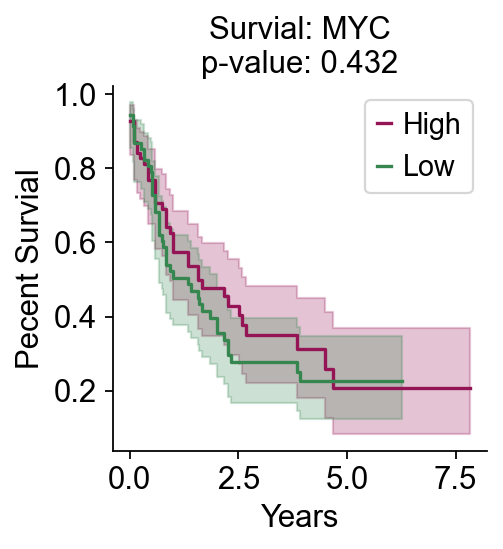

In [11]:
aml_tcga.survival_analysis('MYC',layer='deseq_normalize',plot=True)

If you want to calculate the survival of all genes, you can also use the `survial_analysis_all` to finish it. It may calculate a lot of times.

In [ ]:
aml_tcga.survial_analysis_all()
aml_tcga.adata

Don't forget to save your result.

In [ ]:
aml_tcga.adata.write_h5ad('data/TCGA_AML/aml_tcga_survial_all.h5ad',compression='gzip')